In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
aisles = pd.read_csv('data/aisles.csv', index_col='aisle_id').to_dict()['aisle']
depart = pd.read_csv('data/departments.csv', index_col='department_id').to_dict()['department']
products_df = pd.read_csv('data/products.csv', index_col='product_id')
products_df['aisle'] = products_df.aisle_id.map(lambda x: aisles[x])
products_df['department'] = products_df.department_id.map(lambda x: depart[x])
products_df.drop(['aisle_id', 'department_id'], axis=1, inplace=True)

In [5]:
prior_df = pd.read_csv('data/order_products__prior.csv', index_col='order_id')
train_df = pd.read_csv('data/order_products__train.csv', index_col='order_id')
orders_df = pd.read_csv('data/orders.csv', index_col='order_id')

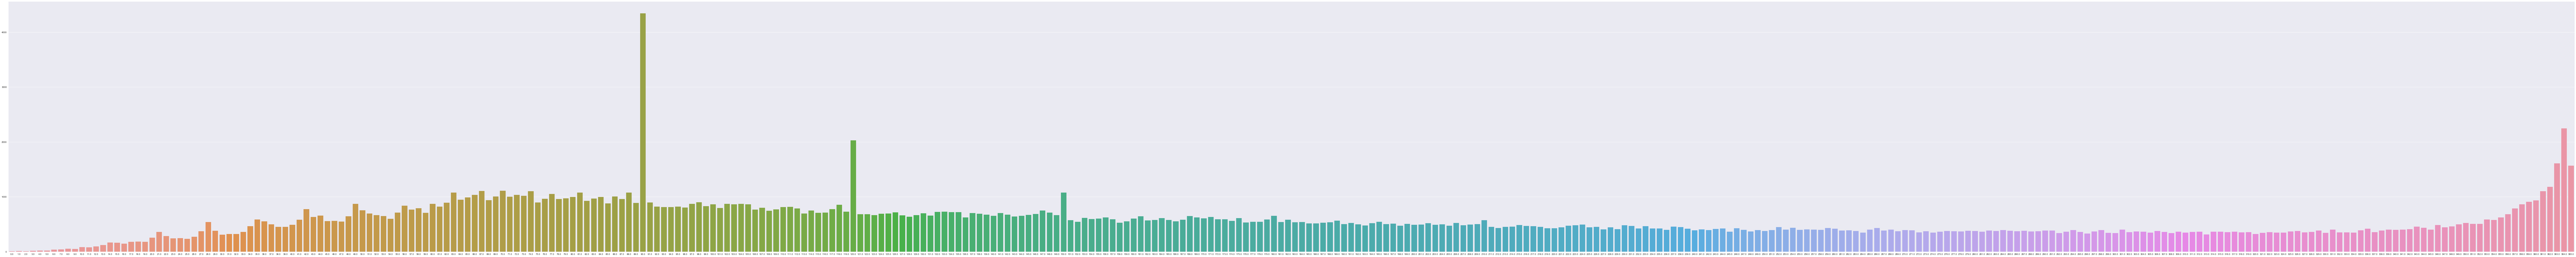

In [6]:
gb1 = orders_df.groupby(orders_df.user_id).days_since_prior_order.aggregate(np.sum)
data = gb1.value_counts()
plt.figure(figsize=(200,20))
sns.barplot(data.index, data.values)

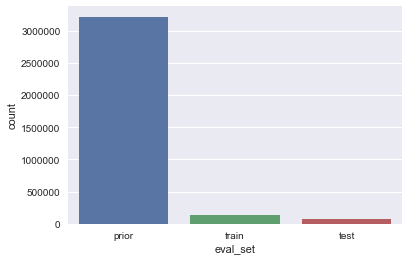

In [7]:
sns.countplot(orders_df.eval_set)

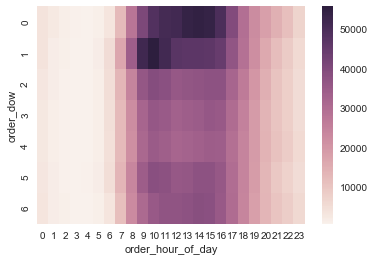

In [38]:
hdf = orders_df.groupby(['order_dow', 'order_hour_of_day']).size().reset_index().pivot("order_dow", "order_hour_of_day", 0)
sns.heatmap(hdf)

In [73]:
s = prior_df[prior_df.reordered==1].groupby('product_id').size()
s = s.order(ascending=False)
s /= sum(s)

/Users/asydorchuk/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: order is deprecated, use sort_values(...)
  from ipykernel import kernelapp as app


In [102]:
orders_df.order_hour_of_day

,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
order_id,,,,,,
2539329,1,prior,1,2,8,NaN
2398795,1,prior,2,3,7,15.0
473747,1,prior,3,3,12,21.0
2254736,1,prior,4,4,7,29.0
431534,1,prior,5,4,15,28.0
3367565,1,prior,6,2,7,19.0
550135,1,prior,7,1,9,20.0
3108588,1,prior,8,1,14,14.0
2295261,1,prior,9,1,16,0.0
